In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [140]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [117]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [118]:
y_scores = model.predict_proba(X_test)[:,1]
y_pred= model.predict(X_test)


In [143]:
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [142]:
y_scores[:5]

array([0.0495401 , 0.17460501, 0.09362911, 0.25511417, 0.63549093])

In [121]:
from sklearn.metrics import roc_curve,auc

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [122]:
roc_auc = auc(fpr, tpr)


In [144]:
thresholds[:10]

array([       inf, 0.99355591, 0.95264   , 0.95243858, 0.8246679 ,
       0.76880526, 0.76199926, 0.6838953 , 0.67536162, 0.67420296])

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'False Positive Rate(FPR)')

Text(0, 0.5, 'True Positive Rate(TPR)')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

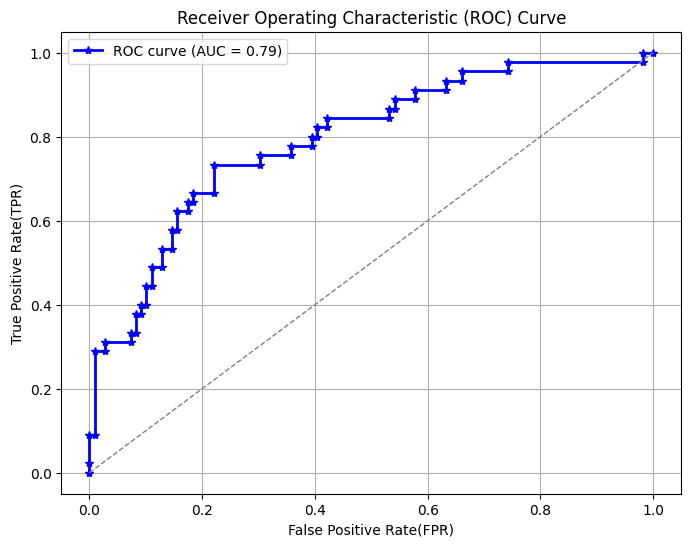

In [124]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b',marker='*', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [139]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)


Optimal threshold is: 0.36864155794401016
